In [1]:
# Import useful modules
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#from Box_cox_test import X1_test, Y_test
housing = pd.read_csv("~/Desktop/Python_Machine_Learning_Project/ML_Kaggle_Project/housing_new.csv")
X1 =housing.iloc[:,3:]
Y=housing["SalePrice"]

In [3]:
# Split clean data into a training and validation set
X1, X_test, Y, Y_test = train_test_split(X1, Y, test_size = 0.3)

In [4]:
# Scale the data 
scaler = StandardScaler().fit(X1)
features = scaler.transform(X1)
X1_std = pd.DataFrame(features, columns = X1.columns)

In [5]:
# Test a simple SVR model
svm_model = SVR()
test = svm_model.fit(X1_std, Y)

In [6]:
# Score of validation model
svm_model.score(X1_std, Y)

-0.0023673986250238865

In [7]:
# Check parameters in test SVR
test.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [8]:
# Run a randomized grid search (to avoid running every parameter combination)
params = {'C':np.linspace(1,100,20), 'gamma': ['auto', 'scale'], 
          'kernel': ['linear']}
rand = RandomizedSearchCV(svm_model, params, n_iter = 20, cv = 5, n_jobs = -1)
rand.fit(X1_std, Y)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear']})

In [9]:
# Score from randomized grid search
rand.score(X1_std, Y)

0.9314656732547295

In [10]:
# Check the best score of the cross validation
rand.best_score_

0.9228467708100719

In [11]:
# Best parameters from randomized grid search
rand.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 100.0}

In [12]:
# Calculate RMSE based on predictions
predictions = rand.predict(X1_std)
print(np.sqrt(mean_squared_error(predictions, Y)))

16786.12656072665


In [13]:
# Scale the validation data based on the scaler from the training data
features1 = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(features1, columns = X1_std.columns)

In [14]:
# Score and RSME of the validation data
predictions_test = rand.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(predictions_test, Y_test)))
rand.score(X_test_scaled, Y_test)

17861.161992073743


0.9171065841098185

In [15]:
# View the coefficients from the random cross validation
rand.best_estimator_.coef_

array([[ 5.81727047e+03, -5.08001393e+03,  5.82509388e+02,
         1.52183404e+03,  1.88650253e+03,  3.63292475e+03,
         1.68001549e+03,  5.70205088e+02, -1.27973933e+03,
        -1.31509523e+03, -2.45256562e+02, -2.25483085e+03,
        -4.38946782e+01,  7.63810207e+03,  7.13086668e+03,
        -9.43388811e+03, -1.68517674e+03,  4.98726605e+02,
         2.79043243e+03, -8.99311391e+02,  9.56358784e+02,
         1.54330344e+03,  1.40761471e+03,  6.44617413e+02,
         1.31514986e+03,  4.76601721e+03, -1.26020323e+03,
         2.11778192e+03,  3.59891368e+03,  3.47878540e+03,
         0.00000000e+00,  1.27449216e+03, -3.56667515e+03,
        -3.24448118e+00, -9.96287792e+02, -3.43390220e+00,
        -1.34275839e+03,  5.32369635e+03,  4.19814036e+03,
        -1.30250608e+02, -8.41165711e+02,  1.56038855e+02,
         8.90201895e+02,  1.42253886e+01, -4.08025659e+03,
        -3.49101931e+03,  2.69227056e+03,  2.96250529e+03,
         1.30752339e+03,  2.26031159e+03,  1.08647656e+0

In [16]:
# Run a grid search on parameteres from random search
paramDict = {'C':[6.2105], 'gamma':['scale'], 'kernel':['linear']}
grid = GridSearchCV(svm_model, paramDict, cv=3, return_train_score = True)
grid.fit(X1_std, Y)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [6.2105], 'gamma': ['scale'],
                         'kernel': ['linear']},
             return_train_score=True)

In [17]:
grid.best_params_

{'C': 6.2105, 'gamma': 'scale', 'kernel': 'linear'}

In [18]:
# View best score from cross validation and RMSE for training data
print(grid.best_score_)
predictions = grid.predict(X1_std)
np.sqrt(mean_squared_error(predictions, Y))

0.8599917188666003


21806.82364385217

In [19]:
# View best score from cross validation and RMSE for test data
print(grid.score(X_test_scaled, Y_test))
predictions2 = grid.predict(X_test_scaled)
np.sqrt(mean_squared_error(predictions2, Y_test))

0.885928486676893


20952.617877747638

In [20]:
# View the coefficients from the grid search SVR model
grid.best_estimator_.coef_

array([[ 4.25940540e+03, -1.29584107e+03, -3.64524835e+01,
         2.20424333e+02, -7.06356489e+01,  1.69648228e+03,
         1.42280450e+03,  1.90692696e+03, -3.17516769e+02,
        -3.45799099e+02, -3.12159354e+02, -1.46295856e+03,
         2.48724555e+02,  5.20625377e+03,  2.69140074e+03,
        -2.51401945e+03, -2.02288212e+03,  1.17596829e+03,
         1.33683964e+03, -9.50558663e+01,  5.56317373e+02,
         1.61167392e+03,  2.70311979e+03,  1.21599292e+03,
         2.55737420e+03,  2.88105386e+03, -2.59091148e+02,
         1.13818206e+03,  1.85701168e+03,  1.08307924e+03,
         0.00000000e+00,  1.13940883e+03, -4.86825424e+02,
         2.20097737e+03, -3.69542786e+02,  9.12170482e+02,
         2.18856650e+02,  3.48633170e+03,  2.23569715e+03,
        -9.57357595e+02,  8.89270680e+02,  5.20866218e+02,
         1.09892470e+03,  3.81721596e+02,  4.10160778e+02,
        -1.17973729e+03,  2.71187246e+03,  2.98737596e+03,
         6.89071684e+02,  2.91040812e+03,  1.11581623e+0

In [21]:
# View the intercept
grid.best_estimator_.intercept_

array([147524.25833081])

In [22]:
# Import pickle so model data can be saved
import pickle

In [23]:
# Create pickle file of SVR model
filename = 'Pickle_SVR.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [24]:
# Ceate pickle file of scaler transformation function
pickle.dump(scaler, open('scaler.pkl','wb'))

In [25]:
# Open same pickle file of SVR model
with open('Pickle_SVR.pkl', 'rb') as f:
    grid = pickle.load(f)

In [26]:
# Open same scaler file
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [27]:
grid.best_score_

0.8599917188666003

In [28]:
X_test_scaled.columns

Index(['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Condition1',
       ...
       'Electrical__FuseP', 'Electrical__None', 'Electrical__SBrkr',
       'GarageFinish__No Garage', 'GarageFinish__RFn', 'GarageFinish__Unf',
       'Fence__GdWo', 'Fence__MnPrv', 'Fence__MnWw', 'Fence__No Fence'],
      dtype='object', length=132)

In [29]:
# Create dictionary of target values to be compared with predicted
Y_test = pd.DataFrame(Y_test)

In [30]:
# Scale the test data based on the scaler from the training data
features_test = scaler.transform(X_test)
X1_test_scaled = pd.DataFrame(features_test, columns = X_test.columns)

In [31]:
# View the RMSE and score of the actual test data
print(grid.score(X1_test_scaled, Y_test))
predictions_test = grid.predict(X1_test_scaled)
np.sqrt(mean_squared_error(predictions_test, Y_test))

0.885928486676893


20952.617877747638

In [32]:
# Create a dataframe of the predicted values
predict = pd.DataFrame(predictions_test.reshape(-1,1))

In [33]:
# View the predicted values
Y_test[['Predicted']] = predict

In [34]:
X_test.columns

Index(['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Condition1',
       ...
       'Electrical__FuseP', 'Electrical__None', 'Electrical__SBrkr',
       'GarageFinish__No Garage', 'GarageFinish__RFn', 'GarageFinish__Unf',
       'Fence__GdWo', 'Fence__MnPrv', 'Fence__MnWw', 'Fence__No Fence'],
      dtype='object', length=132)

In [35]:
# check feature importance
coefficients = pd.concat([pd.DataFrame(X_test.columns),pd.DataFrame(np.transpose(grid.best_estimator_.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Coefficient']
coefficients.sort_values('Coefficient', ascending=False)


,Feature,Coefficient
13,OverallQual,5206.253768
79,TotalSF,4819.645016
0,GrLivArea,4259.405395
74,GrLivArea_year,4223.780907
37,1stFlrSF,3486.331697
...,...,...
1,MSSubClass,-1295.841074
126,GarageFinish__RFn,-1389.132322
11,BldgType,-1462.958557
16,YearRemodAdd,-2022.882121


In [36]:
coefficients['Importance'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Importance', ascending=False)

In [37]:
coefficients['Importance'] = coefficients['Importance'].astype(float)
coefficients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 13 to 68
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Feature      132 non-null    object 
 1   Coefficient  132 non-null    float64
 2   Importance   132 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


In [46]:
coefficients[coefficients.Importance>1000]

,Feature,Coefficient,Importance
13,OverallQual,5206.253768,5206.253768
79,TotalSF,4819.645016,4819.645016
0,GrLivArea,4259.405395,4259.405395
74,GrLivArea_year,4223.780907,4223.780907
37,1stFlrSF,3486.331697,3486.331697
76,Price_by_hood,3082.844048,3082.844048
47,TotRmsAbvGrd,2987.375961,2987.375961
49,Fireplaces,2910.408123,2910.408123
25,BsmtQual,2881.053862,2881.053862
46,KitchenQual,2711.872459,2711.872459


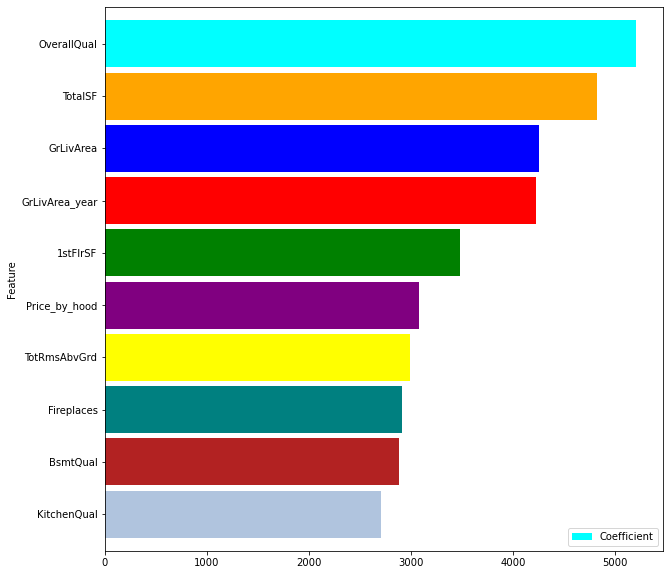

In [39]:
plot1 = coefficients.iloc[0:10].plot(kind='barh', x='Feature', y='Coefficient', 
                                     color=['cyan', 'orange', 'blue', 'red', 'green', 'purple', 'yellow', 
                                            'teal', 'firebrick', 'lightsteelblue'], 
                                     figsize=(10,10), width=.9).invert_yaxis()


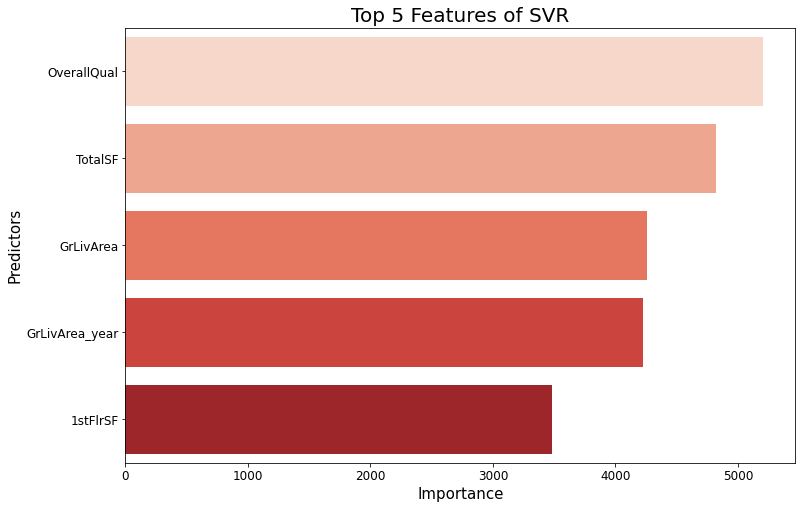

In [40]:
plt.figure(figsize=(12,8))
b = sns.barplot(y = coefficients.Feature.iloc[0:5], 
            x = coefficients.Coefficient.iloc[0:5],
           palette='Reds')
b.set_xlabel("Importance", fontsize=15)
b.set_ylabel("Predictors",fontsize = 15)
b.set_title("Top 5 Features of SVR", fontsize=20)
b.tick_params(labelsize = 12)

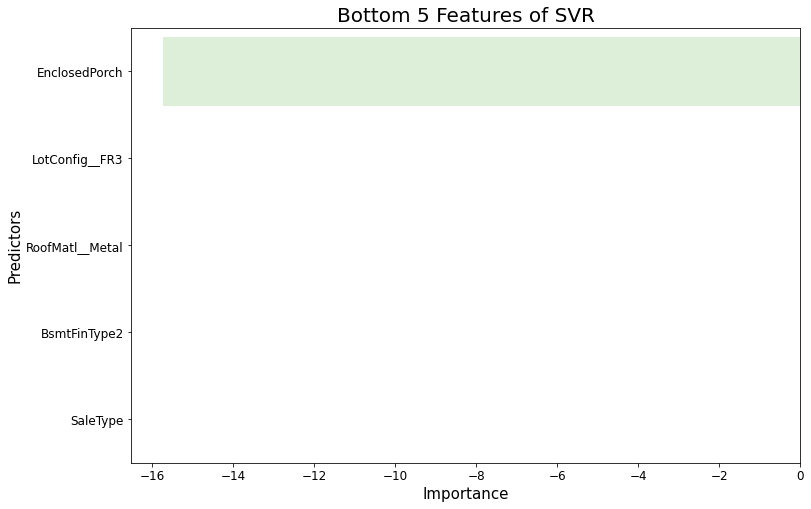

In [41]:
plt.figure(figsize=(12,8))
c = sns.barplot(y = coefficients.Feature.iloc[-5::], 
            x = coefficients.Coefficient.iloc[-5::],
           palette='Greens')
c.set_xlabel("Importance", fontsize=15)
c.set_ylabel("Predictors",fontsize = 15)
c.set_title("Bottom 5 Features of SVR", fontsize=20)
c.tick_params(labelsize = 12)

In [42]:
overall_qual_train = X_test[X_test['OverallQual']<=2][['OverallQual',  'TotalSF', 'LotArea']]

overall_qual_test = X_test[X_test['OverallQual']<=2][['OverallQual',  'TotalSF', 'LotArea']]

print(overall_qual_train)
print(overall_qual_test)

      OverallQual  TotalSF  LotArea
5948            2   1064.0     6120
6212            2    810.0    21780
6107            2    810.0    21780
6137            2    810.0    21780
5366            2    996.0     8088
...           ...      ...      ...
6091            2    810.0    21780
6114            2    810.0    21780
3057            2   1015.0     5400
6095            2    810.0    21780
6183            2    810.0    21780

[63 rows x 3 columns]
      OverallQual  TotalSF  LotArea
5948            2   1064.0     6120
6212            2    810.0    21780
6107            2    810.0    21780
6137            2    810.0    21780
5366            2    996.0     8088
...           ...      ...      ...
6091            2    810.0    21780
6114            2    810.0    21780
3057            2   1015.0     5400
6095            2    810.0    21780
6183            2    810.0    21780

[63 rows x 3 columns]
